In [35]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns

plt.style.use("Solarize_Light2")

<h3> Q1. Loading the DataSet into Pandas </h3>


In [36]:
# Loading the dataset from the CSV file into variable "data"
data = pd.read_csv("Dataset/DataScienceSalaries.csv")

# Printing the first 5 rows of the dataset to verify loading
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [37]:
# Checking the shape of the dataset
data.shape

(3755, 11)

In [38]:
# Checking the general information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [39]:
# Checking the summary statistics of the numerical columns in the dataset
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [40]:
# Checking for missing values and dealing with them if any
data.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [41]:
# Checking for duplicate values
data.duplicated().sum()

1171

In [42]:
# Checking Unique values in the dataset
data.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

<h3>Q2. Write a python program to remove unnecessary columns i.e., salary and salary currency</h3>


In [43]:
# Dropping the 'salary_currency' and 'salary' column as it is redundant
data_filtered = data.drop(["salary", "salary_currency"], axis=1)
# Checking the successful removal of the columns
data_filtered.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary_in_usd', 'employee_residence', 'remote_ratio',
       'company_location', 'company_size'],
      dtype='object')

<h3>Q3. Checking for any NaN missing values </h3>


In [44]:
# Checking if there are any NaN missing values
data_filtered.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

<h3>Q4. Checking for Duplicates </h3>


In [45]:
# Checking Duplicate Values in the dataset
n_duplicates = data_filtered.duplicated().sum()

# Printing the number of duplicate rows
if n_duplicates > 0:
    print(f"There are {n_duplicates} duplicate rows in the dataset")
else:
    print("There are no duplicate rows in the dataset")

There are 1171 duplicate rows in the dataset


<h3>Q5. Write a python program to see the unique values from all the columns in the dataframe. </h3>


In [46]:
# Checking the amount of unique values in the dataset
data_filtered.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [47]:
# Printing all the unique values in the dataset according to the columns
for column in data_filtered.columns:
    print(f"{column}: {data_filtered[column].unique()}")

work_year: [2023 2022 2020 2021]
experience_level: ['SE' 'MI' 'EN' 'EX']
employment_type: ['FT' 'CT' 'FL' 'PT']
job_title: ['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOps Engineer' 'Head of Data'
 'Data Science Manager' 'Data Manager' 'Machine Learning Researcher'
 'Big Data Engineer' 'Data Specialist' 'Lead Data Analyst'
 'BI Data Engineer' 'Director of Data Science'
 'Machine Learning Scientist' 'MLOps Engineer' 'AI Scientist'
 'Autonomous Vehicle Technician' 'Applied Machine Learning Scientist'
 'Le

<h3>Q6. Rename the experience level columns as below. <br>
<ul> SE – Senior Level/Expert </ul>
<ul> MI – Medium Level/Intermediate </ul>
<ul> EN – Entry Level </ul>
<ul> EX – Executive Level </ul>
</h3>


In [48]:
# Current Column 'Experience Level' in the DataSet
data_filtered["experience_level"].head()

0    SE
1    MI
2    MI
3    SE
4    SE
Name: experience_level, dtype: object

In [49]:
# Renaming the Experience Level Column as Follows
# SE - Senior Level/Expert, MI - Medium Level/Intermediate, EN - Entry Level, EX - Executive Level
data_filtered["experience_level"] = data_filtered["experience_level"].replace(
    ["SE", "MI", "EN", "EX"],
    [
        "Senior Level/Expert",
        "Medium Level/Intermediate",
        "Entry Level",
        "Executive Level",
    ],
)
data_filtered.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior Level/Expert,FT,Principal Data Scientist,85847,ES,100,ES,L
1,2023,Medium Level/Intermediate,CT,ML Engineer,30000,US,100,US,S
2,2023,Medium Level/Intermediate,CT,ML Engineer,25500,US,100,US,S
3,2023,Senior Level/Expert,FT,Data Scientist,175000,CA,100,CA,M
4,2023,Senior Level/Expert,FT,Data Scientist,120000,CA,100,CA,M


In [50]:
# Sum of the Variable Salary In USD
data["salary_in_usd"].sum()
print("Sum of the Variable Salary In USD:", data["salary_in_usd"].sum())
# Mean of the Variable Salary In USD
data["salary_in_usd"].mean()
print("Mean of the Variable Salary In USD:", data["salary_in_usd"].mean())
# Standard Deviation of the Variable Salary In USD
print("Standard Deviation of the Variable Salary In USD:", data["salary_in_usd"].std())
# Skewness of the Variable Salary In USD
print("Skewness of the Variable Salary In USD:", data["salary_in_usd"].skew())
# Kurtosis of the Variable Salary In USD
print("Kurtosis of the Variable Salary In USD:", data["salary_in_usd"].kurt())

Sum of the Variable Salary In USD: 516576814
Mean of the Variable Salary In USD: 137570.38988015978
Standard Deviation of the Variable Salary In USD: 63055.6252782241
Skewness of the Variable Salary In USD: 0.5364011659712974
Kurtosis of the Variable Salary In USD: 0.8340064594833612


<h3> Q7. Write a Python program to show summary statistics of sum, mean, standard deviation, skewness, and kurtosis of any chosen variable. </h3>


In [51]:
def summary_statistics(data_filtered, column):
    """
    Print the summary statistics (sum, mean, standard deviation, skewness, kurtosis) for a given column of a DataFrame.

    Parameters:
    df (pandas.DataFrame): The DataFrame to calculate the statistics from.
    column (str): The name of the column to calculate the statistics for.
    """
    print(f"Summary statistics for {column}:")
    print(f"Sum: {data_filtered[column].sum()}")
    print(f"Mean: {data_filtered[column].mean()}")
    print(f"Standard Deviation: {data_filtered[column].std()}")
    print(f"Skewness: {data_filtered[column].skew()}")
    print(f"Kurtosis: {data_filtered[column].kurt()}")


# Call the function for the 'salary_in_usd' column
summary_statistics(data_filtered, "salary_in_usd")

Summary statistics for salary_in_usd:
Sum: 516576814
Mean: 137570.38988015978
Standard Deviation: 63055.6252782241
Skewness: 0.5364011659712974
Kurtosis: 0.8340064594833612


<h3>Q8. Write a Python program to calculate and show correlation of all variables.</h3>


In [52]:
# Calculate the correlation matrix for all numerical variables in the DataFrame
correlation_matrix = data_filtered.select_dtypes(include=["int64", "float64"]).corr()

# Display the correlation matrix
correlation_matrix

,work_year,salary_in_usd,remote_ratio
work_year,1.00000,0.228290,-0.236430
salary_in_usd,0.22829,1.000000,-0.064171
remote_ratio,-0.23643,-0.064171,1.000000


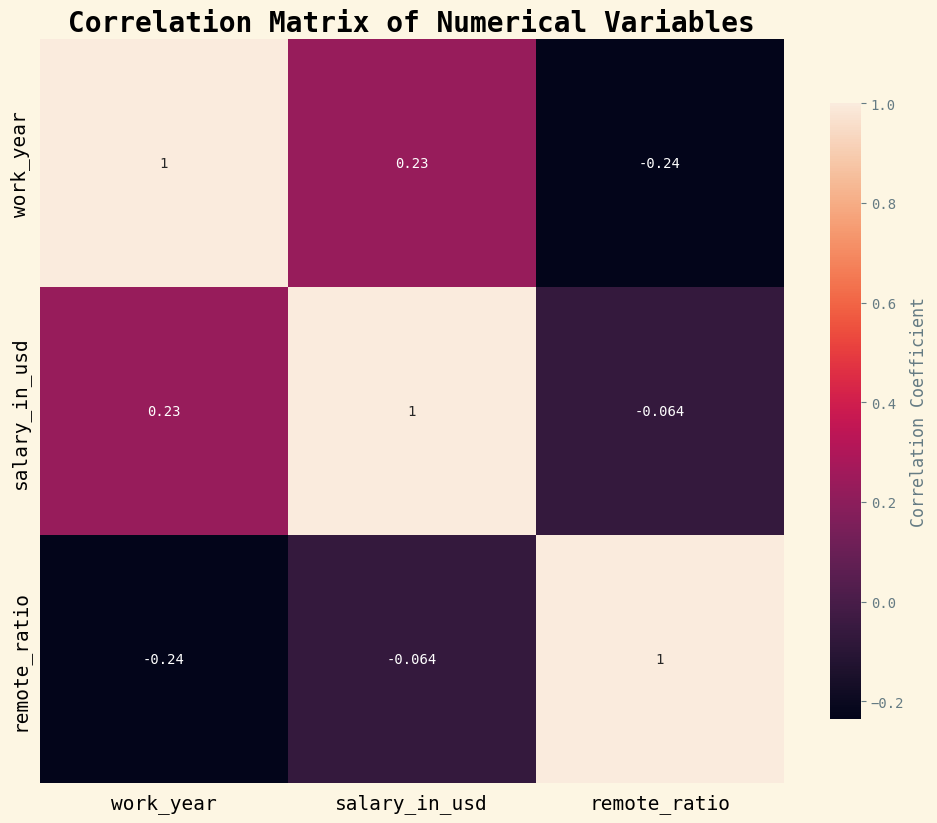

In [53]:
# Create a new figure for the heatmap
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
# annot=True makes it so the values are written on the squares
# square=True makes the plot square-shaped
# cmap='rocket' is the color map used
# cbar_kws={'label': 'Correlation Coefficient'} adds a label to the color bar
sns.heatmap(
    correlation_matrix,
    annot=True,
    square=True,
    cmap="rocket",
    cbar_kws={"label": "Correlation Coefficient", "shrink": 0.8},
)

# Add a title to the heatmap and increase the font size
plt.title(
    "Correlation Matrix of Numerical Variables",
    fontsize=20,
    fontfamily="monospace",
    fontweight="bold",
    color="black",
)

# Increase the font size of the x-axis and y-axis labels
plt.xticks(fontsize=14, fontfamily="monospace", color="black")
plt.yticks(fontsize=14, fontfamily="monospace", color="black")

# Show the plot
plt.show()

<h3>Q9. Write a python program to find out top 15 jobs. Make a bar graph of sales as well.<h3>


In [54]:
# Finding the 15 Most Popular Job Titles
top_15_jobs = data_filtered["job_title"].value_counts().head(15)
top_15_jobs

job_title
Data Engineer                 1040
Data Scientist                 840
Data Analyst                   612
Machine Learning Engineer      289
Analytics Engineer             103
Data Architect                 101
Research Scientist              82
Data Science Manager            58
Applied Scientist               58
Research Engineer               37
ML Engineer                     34
Data Manager                    29
Machine Learning Scientist      26
Data Science Consultant         24
Data Analytics Manager          22
Name: count, dtype: int64

C:\Users\serot\AppData\Local\Temp\ipykernel_23244\330283250.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


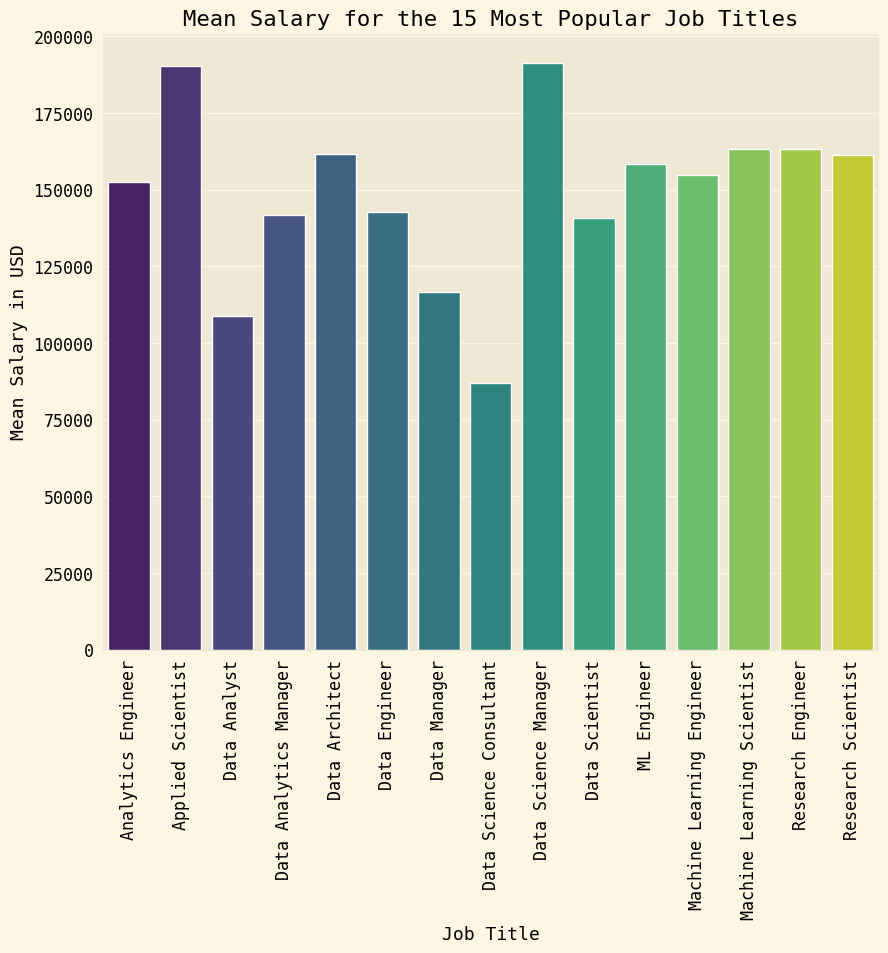

In [55]:
# Mean of the Salary In USD for the 15 Most Popular Job Titles
mean_salary_top_15_jobs = (
    data_filtered[data_filtered["job_title"].isin(top_15_jobs.index)]
    .groupby("job_title")["salary_in_usd"]
    .mean()
)

# Barplot of the Mean Salary for the 15 Most Popular Job Titles
plt.figure(figsize=(10, 8))
sns.barplot(
    x=mean_salary_top_15_jobs.index, y=mean_salary_top_15_jobs.values, palette="viridis"
)

# Rotate the x-axis labels and set their color and font
plt.xticks(rotation=90, color="black", fontfamily="monospace", fontsize=12)

# Set the color and font of the y-axis labels
plt.yticks(color="black", fontfamily="monospace", fontsize=12)

# Set the title and its color and font
plt.title(
    "Mean Salary for the 15 Most Popular Job Titles",
    fontsize=16,
    color="black",
    fontfamily="monospace",
)

# Set the x-axis label and its color and font
plt.xlabel("Job Title", fontsize=13, color="black", fontfamily="monospace")

# Set the y-axis label and its color and font
plt.ylabel("Mean Salary in USD", fontsize=13, color="black", fontfamily="monospace")

# Show the plot
plt.show()

<h3>Q10. Which job has the highest salaries? Illustrate with bar graph.</h3>


C:\Users\serot\AppData\Local\Temp\ipykernel_23244\3356117241.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=job_salary.index, y=job_salary.values, palette="viridis")


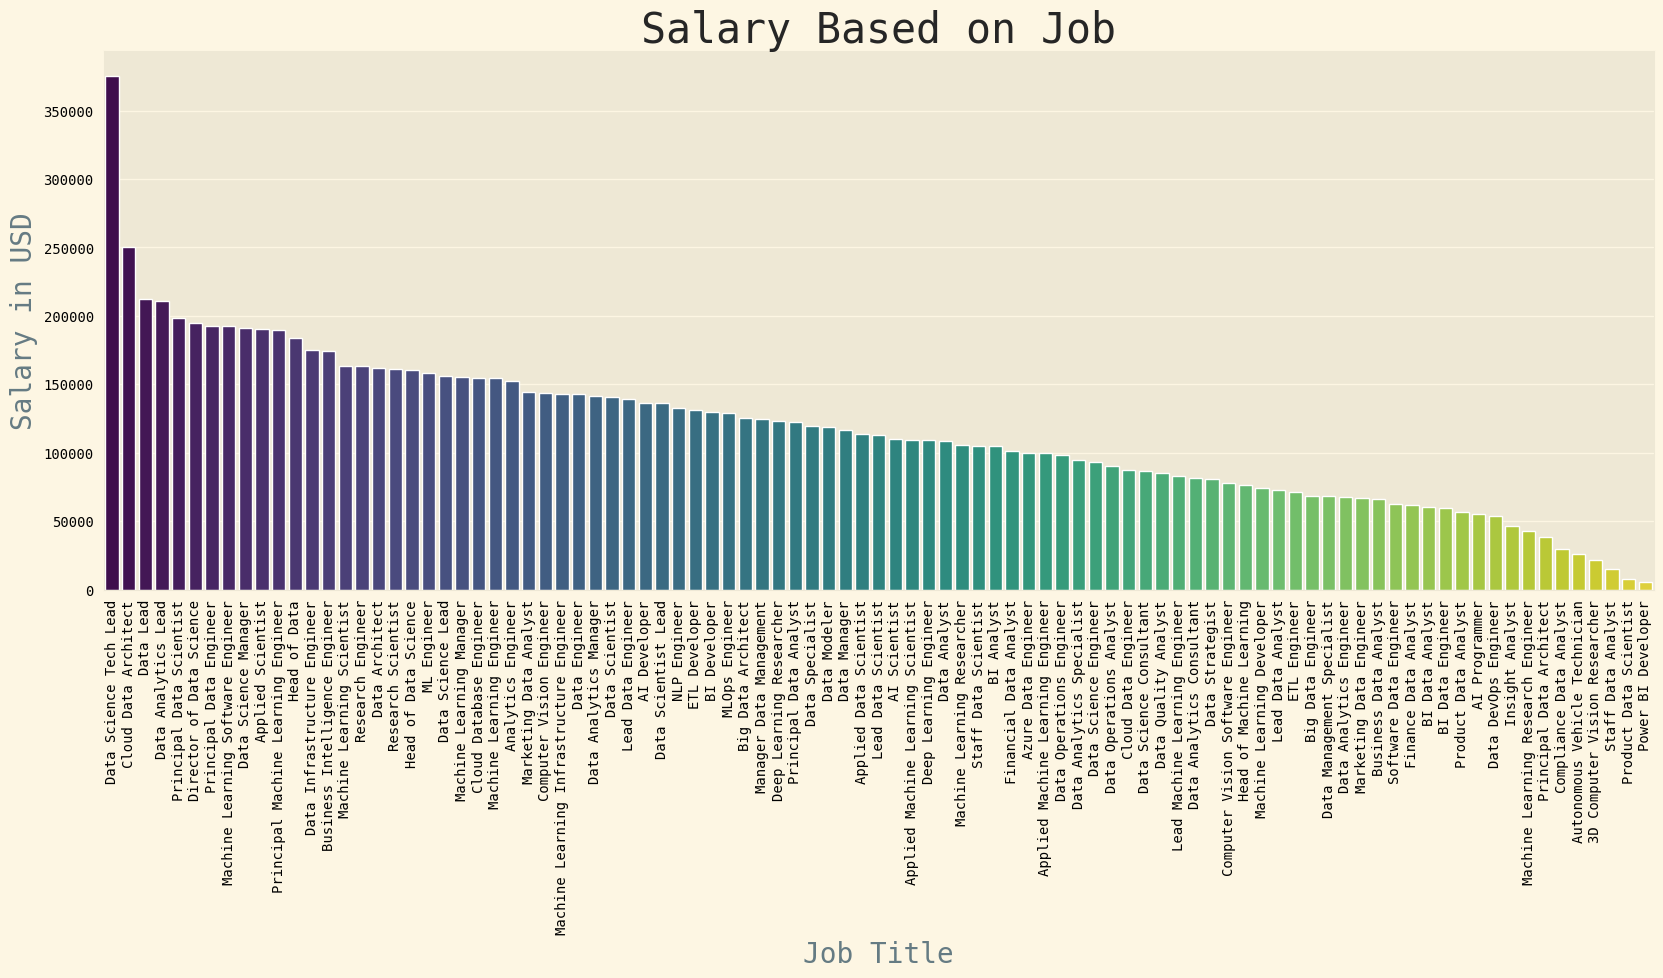

In [56]:
# Salaries Based on Job
# Group the data by 'job_title', calculate the mean salary for each job, and sort the results in descending order
job_salary = (
    data_filtered.groupby("job_title")["salary_in_usd"]
    .mean()
    .sort_values(ascending=False)
)

# Create a new figure with a specified size
plt.figure(figsize=(20, 7))

# Create a bar plot of the mean salaries, with job titles on the x-axis and mean salaries on the y-axis
# The 'palette' argument specifies the color palette to use
sns.barplot(x=job_salary.index, y=job_salary.values, palette="viridis")

# Set the title of the plot, with a specified font size, font weight, and font family
plt.title("Salary Based on Job", fontsize=30, fontweight=20, fontfamily="monospace")

# Set the label for the x-axis, with a specified font size, font weight, and font family
plt.xlabel("Job Title", fontsize=20, fontweight=20, fontfamily="monospace")

# Rotate the x-axis labels by 90 degrees, and set their font size, font weight, font family, and color
plt.xticks(
    rotation=90, fontsize=10, fontweight=15, fontfamily="monospace", color="black"
)

# Set the label for the y-axis, with a specified font size, font weight, and font family
plt.ylabel("Salary in USD", fontsize=20, fontweight=20, fontfamily="monospace")

# Set the font size, font family, and color of the y-axis labels
plt.yticks(fontsize=10, fontfamily="monospace", color="black")

# Display the plot
plt.show()

<h3>Q.11 Python Program to Find out Salaries Based on Experience Level</h3>


C:\Users\serot\AppData\Local\Temp\ipykernel_23244\2156056342.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=salary_explvl.index, y=salary_explvl.values, palette="viridis")


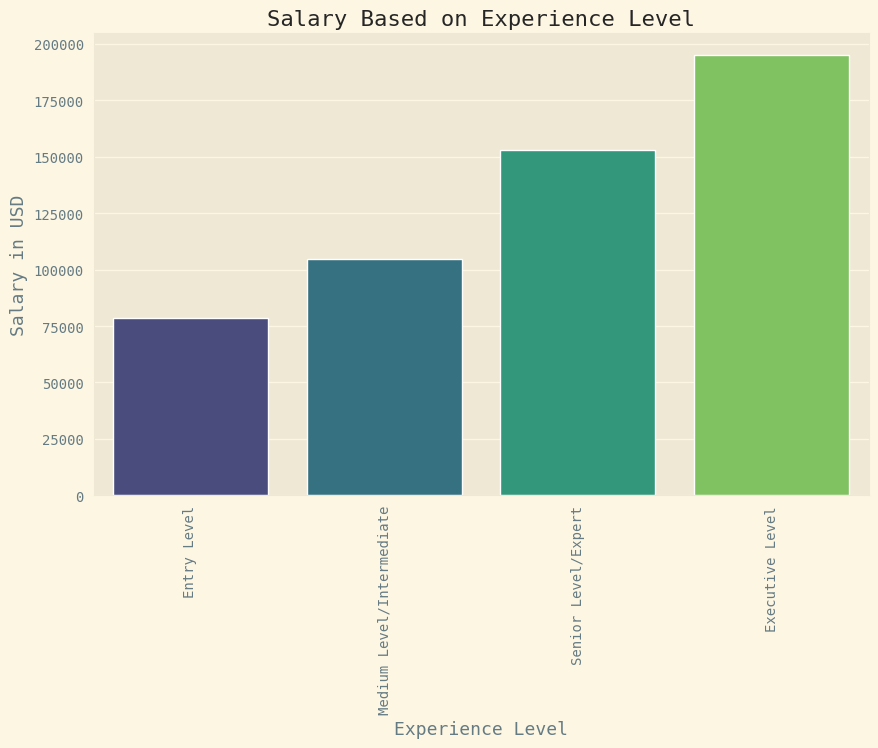

In [57]:
# Group the data by 'experience_level', calculate the mean salary for each level, round the results, and sort them
salary_explvl = (
    data_filtered.groupby("experience_level")["salary_in_usd"]
    .mean()
    .round()
    .sort_values()
)

# Create a new figure with a specified size
plt.figure(figsize=(10, 6))

# Create a bar plot of the mean salaries, with experience levels on the x-axis and mean salaries on the y-axis
# The 'palette' argument specifies the color palette to use
sns.barplot(x=salary_explvl.index, y=salary_explvl.values, palette="viridis")

# Set the title of the plot, with a specified font size and font family
plt.title("Salary Based on Experience Level", fontsize=16, fontfamily="monospace")

# Set the label for the x-axis, with a specified font size and font family
plt.xlabel("Experience Level", fontsize=13, fontfamily="monospace")

# Rotate the x-axis labels by 90 degrees, and set their font size and font family
plt.xticks(rotation=90, fontsize=10, fontfamily="monospace")

# Set the label for the y-axis, with a specified font size and font family
plt.ylabel("Salary in USD", fontsize=13, fontfamily="monospace")

# Set the font size and font family of the y-axis labels
plt.yticks(fontsize=10, fontfamily="monospace")

# Display the plot
plt.show()

<h3>Q.12 Write a Python program to show histogram and box plot of any chosen different variables. Use proper labels in the graph.</h3>


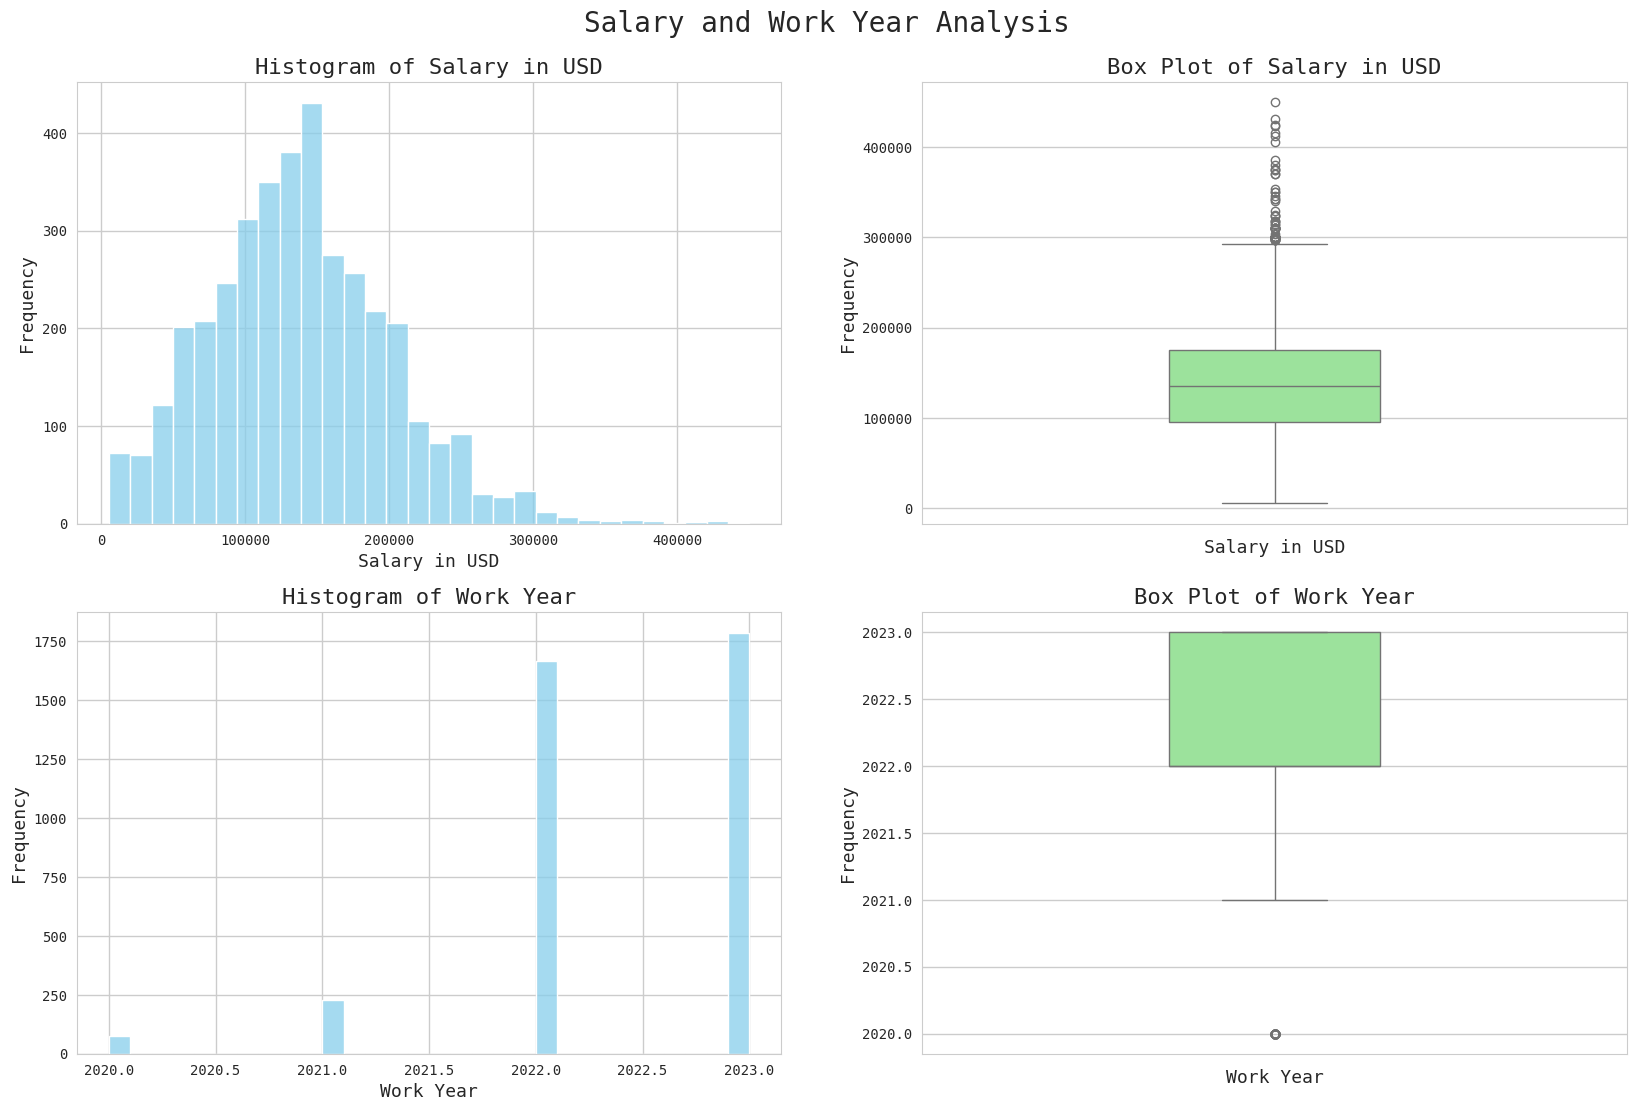

In [58]:
# Set the color scheme and font family
sns.set_style("whitegrid")
plt.rcParams["font.family"] = "monospace"

# Create a new figure with 2 rows and 2 columns of subplots, and a specified size
fig, axs = plt.subplots(2, 2, figsize=(20, 12))

# Add a main title to the figure
fig.suptitle("Salary and Work Year Analysis", fontsize=20)

# Create a histogram for 'salary_in_usd' in the first subplot
sns.histplot(
    data_filtered["salary_in_usd"], bins=30, kde=False, color="skyblue", ax=axs[0, 0]
)
axs[0, 0].set_title("Histogram of Salary in USD", fontsize=16)
axs[0, 0].set_xlabel("Salary in USD", fontsize=13)
axs[0, 0].set_ylabel("Frequency", fontsize=13)

# Create a box plot for 'salary_in_usd' in the second subplot
sns.boxplot(data_filtered["salary_in_usd"], color="lightgreen", ax=axs[0, 1], width=0.3)
axs[0, 1].set_title("Box Plot of Salary in USD", fontsize=16)
axs[0, 1].set_xlabel("Salary in USD", fontsize=13)
axs[0, 1].set_ylabel("Frequency", fontsize=13)

# Create a histogram for 'work_year' in the third subplot
sns.histplot(
    data_filtered["work_year"], bins=30, kde=False, color="skyblue", ax=axs[1, 0]
)
axs[1, 0].set_title("Histogram of Work Year", fontsize=16)
axs[1, 0].set_xlabel("Work Year", fontsize=13)
axs[1, 0].set_ylabel("Frequency", fontsize=13)

# Create a box plot for 'work_year' in the fourth subplot
sns.boxplot(data_filtered["work_year"], color="lightgreen", ax=axs[1, 1], width=0.3)
axs[1, 1].set_title("Box Plot of Work Year", fontsize=16)
axs[1, 1].set_xlabel("Work Year", fontsize=13)
axs[1, 1].set_ylabel("Frequency", fontsize=13)

# Display the plot
plt.subplots_adjust(top=0.92)
plt.show()